In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import dlsfunctions as dls

%%latex
Goal: test to see if the numericalderiv function is the culprit due to lack of initialization

In [3]:
r = 2.24e-09
diameter = r * 2 + 3e-9
sigma = 2e-10

m = 20
c = 1
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, diameter, sigma, c)

In [4]:
theta_in = np.append(f_1, beta)
sim_data = dls.g2(theta_in, d, m, gamma, time_in)

In [5]:
ndim = 21
nwalkers = 100
nsteps = 3000

start_pos = dls.create_start_pos(theta_in, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time_in)

In [6]:
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.34533333, 0.34533333, 0.35233333, 0.35666667, 0.35933333,
       0.346     , 0.35166667, 0.332     , 0.334     , 0.33733333,
       0.35266667, 0.34633333, 0.35833333, 0.32733333, 0.35933333,
       0.33933333, 0.357     , 0.33933333, 0.35166667, 0.35566667,
       0.35233333, 0.351     , 0.34433333, 0.352     , 0.34633333,
       0.34366667, 0.374     , 0.35366667, 0.33633333, 0.35833333,
       0.35833333, 0.35133333, 0.36166667, 0.328     , 0.33866667,
       0.341     , 0.35133333, 0.34466667, 0.35      , 0.338     ,
       0.32933333, 0.348     , 0.344     , 0.345     , 0.333     ,
       0.353     , 0.35933333, 0.34766667, 0.356     , 0.35166667,
       0.346     , 0.34566667, 0.33533333, 0.345     , 0.337     ,
       0.34833333, 0.356     , 0.335     , 0.33833333, 0.32966667,
       0.31866667, 0.343     , 0.346     , 0.359     , 0.36033333,
       0.35366667, 0.353     , 0.348     , 0.34566667, 0.36      ,
       0.351     , 0.34666667, 0.35966667, 0.351     , 0.34733

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


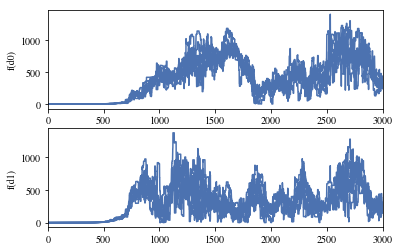

In [7]:
dls.view_burnin_plot(result, 0, 1)

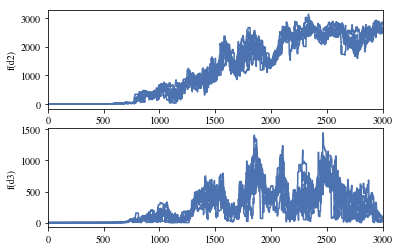

In [8]:
dls.view_burnin_plot(sampler, 2, 3)

In [32]:
chained_samples = dls.chain(result, 2700, 21)

In [33]:
samples_df = dls.create_dataframe(chained_samples, ndim)

In [34]:
q = samples_df.quantile([0.5], axis = 0)

In [35]:
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,634.874029,407.235417,179.026269,996.829168,1285.776042,214.780707,3.338866e+06,8.304853e+08,1.385933e+09,1.553266e+07,136.355759,120.343567,2411.581801,173.212701,365.256968,188.033188,1589.513982,3296.622817,150.797646,186.679341


In [36]:
infered_params = q.values
infered_f = infered_params.flatten()

In [37]:
infered_f.shape

(20,)

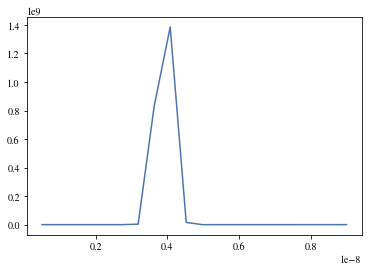

In [38]:
plt.plot(d, infered_f)

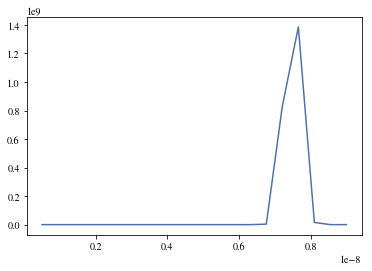

In [31]:
plt.plot(d, f_1)

In [39]:
start_pos

[array([1.70282666e-04, 1.74821065e-04, 1.67876919e-04, 1.13704742e-04,
        1.55189585e-04, 1.53086070e-05, 9.99572476e-05, 7.73255045e-05,
        1.78491616e-05, 1.55869249e-04, 1.55423748e-05, 3.08765742e-05,
        1.91205818e-05, 9.02781878e+01, 3.34153228e+06, 8.30486096e+08,
        1.38593503e+09, 1.55302046e+07, 1.16851792e+03, 6.01863542e-04,
        1.00034336e+00]),
 array([1.28685630e-06, 9.99639006e-05, 1.65111629e-04, 1.13962302e-05,
        1.35124482e-04, 5.71807540e-05, 2.93449842e-05, 2.41828193e-05,
        1.37052361e-04, 1.47688264e-04, 1.14497175e-04, 3.89784772e-07,
        1.48110708e-04, 9.02782766e+01, 3.34153228e+06, 8.30486096e+08,
        1.38593503e+09, 1.55302046e+07, 1.16851773e+03, 6.88109812e-04,
        1.00000773e+00]),
 array([2.34174538e-05, 4.25083070e-05, 6.38820330e-05, 6.14295238e-05,
        4.01766438e-05, 5.53535752e-05, 1.40543801e-04, 1.13179889e-05,
        4.32520501e-05, 1.65158280e-04, 5.11792755e-06, 1.68179612e-04,
        2.00

In [44]:
start_pos1 = start_pos[0]

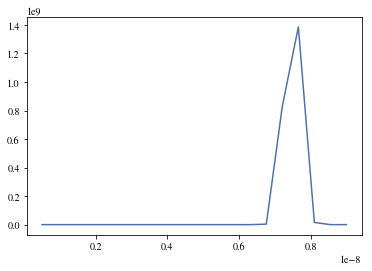

In [46]:
plt.plot(d, start_pos1[0:20])

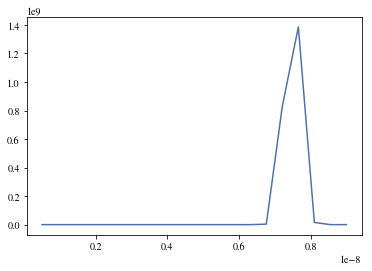

In [47]:
start_pos2 = start_pos[1]
plt.plot(d, start_pos2[0:20])

In [53]:
import seaborn as sns
import pandas as pd

samples = result.chain[:,2500:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19], 'beta': traces[20]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [54]:
q = q.quantile([0.5], axis=0)
q = q.values
q = q.flatten()
q = q[0:20]

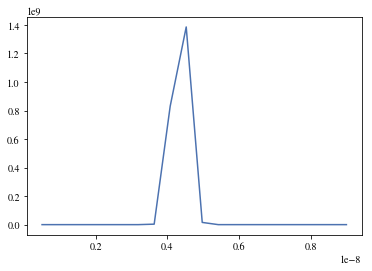

In [55]:
plt.plot(d, q)

In [58]:
# this inferred result is significantly off track.......
ndim = 21
nwalkers = 100
nsteps = 4000

start_pos_1 = dls.create_start_pos(theta_in, ndim, nwalkers)
sampler_1 = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time_in)

In [59]:
result = dls.infer(sampler_1, start_pos_1, nsteps)
result.acceptance_fraction

array([0.35075, 0.35575, 0.36475, 0.36975, 0.36725, 0.35975, 0.37875,
       0.373  , 0.3655 , 0.37925, 0.3575 , 0.3625 , 0.36525, 0.3725 ,
       0.361  , 0.36125, 0.359  , 0.3605 , 0.364  , 0.3805 , 0.359  ,
       0.37175, 0.36875, 0.35175, 0.36025, 0.374  , 0.379  , 0.37225,
       0.364  , 0.36475, 0.36575, 0.37225, 0.3785 , 0.36025, 0.371  ,
       0.36175, 0.35375, 0.369  , 0.36925, 0.376  , 0.3655 , 0.36675,
       0.37775, 0.3645 , 0.37075, 0.36975, 0.37475, 0.3735 , 0.3675 ,
       0.36575, 0.37025, 0.37725, 0.36725, 0.36075, 0.36125, 0.369  ,
       0.37875, 0.37075, 0.35625, 0.36475, 0.35825, 0.3745 , 0.3585 ,
       0.37775, 0.3735 , 0.3565 , 0.36675, 0.3795 , 0.36925, 0.354  ,
       0.353  , 0.36375, 0.37325, 0.352  , 0.39225, 0.38225, 0.36225,
       0.36425, 0.35775, 0.3695 , 0.371  , 0.3655 , 0.3695 , 0.36375,
       0.36475, 0.376  , 0.3725 , 0.377  , 0.3665 , 0.36625, 0.37075,
       0.37625, 0.36025, 0.36475, 0.35975, 0.36975, 0.368  , 0.36225,
       0.37   , 0.36

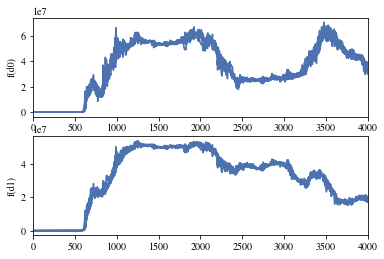

In [60]:
dls.view_burnin_plot(result, 0, 1)

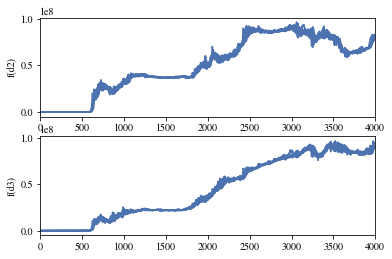

In [61]:
dls.view_burnin_plot(result, 2, 3)

In [62]:
chained_samples = dls.chain(result, 3500, ndim)

In [63]:
samples_df = dls.create_dataframe(chained_samples, m)

In [64]:
samples_df = samples_df.quantile([0.5], axis=0)